In [2]:
from preamble import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

#한글출력을 위한코드
from matplotlib import font_manager, rc
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [4]:
#KNN회귀 분석(출력=k개이웃의 값의 평균)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split #train쓸려면 삽입해야

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [5]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [6]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:102: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


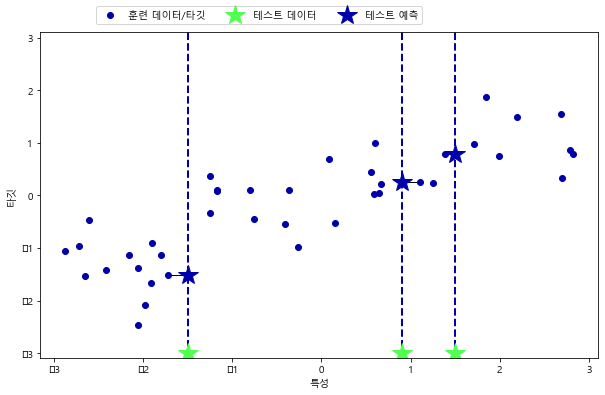

In [7]:
#k=1인경우
mglearn.plots.plot_knn_regression(n_neighbors=1)

C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:102: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


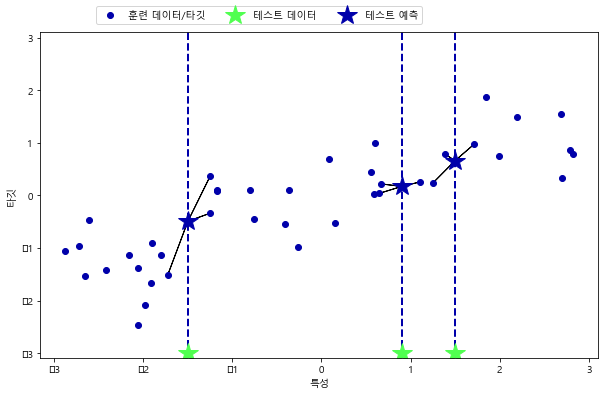

In [8]:
#k=3인경우
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [10]:
#KNN회귀 분석(출력=k개이웃의 값의 평균)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split #train쓸려면 삽입해야

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.5)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

print("테스트 세트 예측:\n", reg.predict(X_test))

print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

#test_size=0.5인 경우로 test해본결과
#R^2의 값이 0.56으로 감소하였습니다.
#따라서 예측정확도가 떨어졌습니다.

테스트 세트 예측:
 [-0.586 -0.079  0.826 -1.894 -1.042 -1.631 -0.079  1.121 -0.446 -1.042
 -0.493  0.826 -1.042  0.413 -0.446 -0.079  1.121 -0.231 -0.231 -0.079]
테스트 세트 R^2: 0.56


C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:102: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


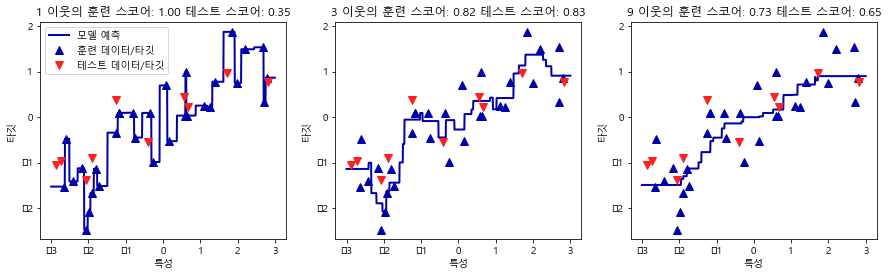

In [9]:
#성능측정

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # zip[이웃수]         1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

#k의 값이 증가할수록  훈련에대한 정확도가 떨어지고 테스트정확도가 오르고 선이 부드러워 집니다.

In [ ]:
#선형회귀 모델 => 데이터를예측하는 `선` 찾기

In [11]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [12]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [14]:
print("lr.coef_:", lr.coef_) #기울기 구하기
print("lr.intercept_:", lr.intercept_) #y절편 구하기

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:102: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


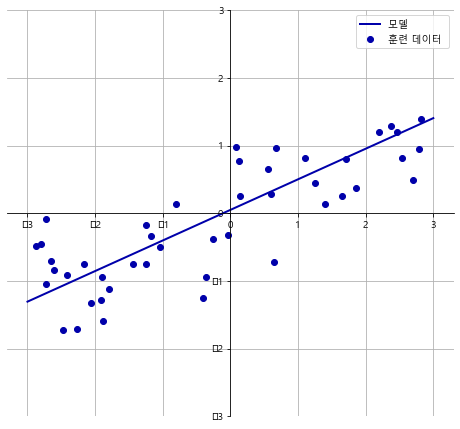

In [41]:
#샘플수=60인 경우 선형회귀 분석
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#선형회귀 그리는 코드
plt.figure(figsize =(8,8))
plt.plot(line , lr.predict(line))
plt.plot(X_train , y_train , 'o', c=mglearn.cm2(0))
         
ax= plt.gca()
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.set_ylim(-3, 3)
ax.legend(["모델 ", "훈련 데이터 ", "테스트 "], loc= "best")
ax.grid(True)
ax.set_aspect("equal")

C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:102: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


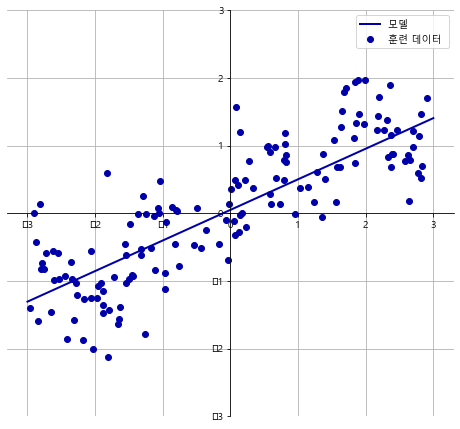

In [43]:
#샘플수=200인 경우 선형회귀 분석
X, y = mglearn.datasets.make_wave(n_samples=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#선형회귀 그리는 코드
plt.figure(figsize =(8,8))
plt.plot(line , lr.predict(line))
plt.plot(X_train , y_train , 'o', c=mglearn.cm2(0))
         
ax= plt.gca()
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.set_ylim(-3, 3)
ax.legend(["모델 ", "훈련 데이터 ", "테스트 "], loc= "best")
ax.grid(True)
ax.set_aspect("equal")

C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:102: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


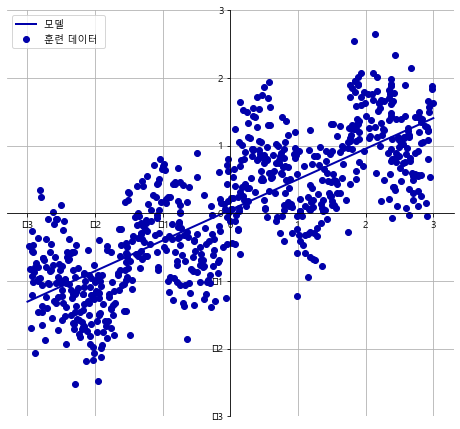

In [45]:
#샘플수=1000인 경우 선형회귀 분석
X, y = mglearn.datasets.make_wave(n_samples=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#선형회귀 그리는 코드
plt.figure(figsize =(8,8))
plt.plot(line , lr.predict(line))
plt.plot(X_train , y_train , 'o', c=mglearn.cm2(0))
         
ax= plt.gca()
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.set_ylim(-3, 3)
ax.legend(["모델 ", "훈련 데이터 ", "테스트 "], loc= "best")
ax.grid(True)
ax.set_aspect("equal")

In [ ]:
#고찰
#샘플수가 높을수록 표현이어렵다(test점수가 낮다)

KNN 테스트 세트 R^2: 0.53
선형회귀 테스트 세트 점수: 0.66


C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:102: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


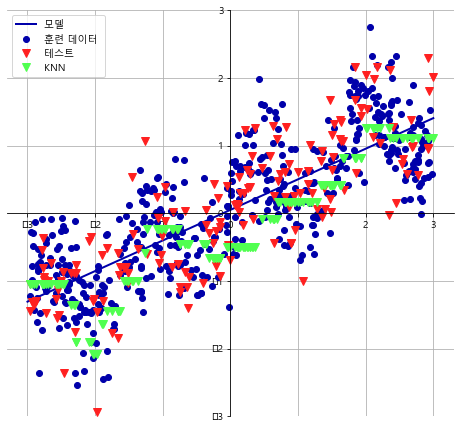

In [31]:
#샘플이 666개인 경우 KNN과 선형회귀 비교
X, y = mglearn.datasets.make_wave(n_samples=666)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.figure(figsize =(8,8))
plt.plot(line , lr.predict(line))
plt.plot(X_train , y_train , 'o', c=mglearn.cm2(0))
plt.plot(X_test , y_test ,'v', c=mglearn.cm2(1), markersize =8)

# KNN결과 출력
#1차원 특징이라서 정확률이 낮다 . 샘플수가 커질수록 정확률이 낮다 . 데이터의 분포가 퍼져서
plt.plot(X_test,reg.predict(X_test) ,'v ', c=mglearn.cm3(2),markersize =8)

         
ax= plt.gca()
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.set_ylim(-3, 3)
ax.legend(["모델 ", "훈련 데이터 ", "테스트 ", "KNN"], loc= "best")
ax.grid(True)
ax.set_aspect("equal")

print("KNN 테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))
print("선형회귀 테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

#따라서 n=666일때는 선형회귀가 더 정확하다.

In [ ]:
#보스턴 주택가격

In [47]:
from sklearn.datasets import load_boston
boston=load_boston()

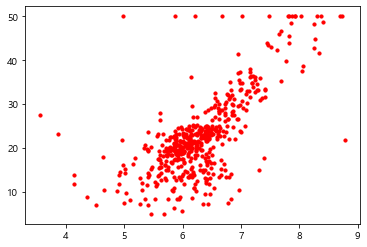

In [49]:
import matplotlib.pyplot as plt
plt.scatter(boston.data[:,5],boston.target, color='r',s=10)

In [ ]:
#방의갯수가 늘어날수록 주택가격이 올라간다

In [54]:
#속성하나로 선형회귀 실험

X=boston.data[:,5]

print(X.shape)

X_1=np.atleast_2d(X)
X_2=np.transpose(X_1)
print(X_2.shape)
y=boston.target

lr.fit(X_2,y)

y_predicted=lr.predict(X_2)

print("w[0]: %f b: %f" %(lr.coef_[0],lr.intercept_))

(506,)
(506, 1)
w[0]: 9.102109 b: -34.670621


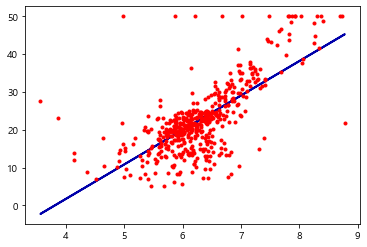

In [55]:
#선형 회귀모델 그리기!

plt.plot(X_2,y_predicted)
plt.plot(X_2,y,'o',color='r', markersize=3)

In [56]:
#선형 회귀모델 성능측정
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
print("X_train.shape: {}".format(X_train.shape),"X_test.shape: {}".format(X_test.shape))

#선형회귀
lr = LinearRegression().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

X_train.shape: (379, 13) X_test.shape: (127, 13)
훈련 세트 점수: 0.77
테스트 세트 점수: 0.64


In [60]:
#KNN 성능측정
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
print("X_train.shape: {}".format(X_train.shape),"X_test.shape: {}".format(X_test.shape))

#KNN K=7일떄
lr = KNeighborsRegressor(7).fit(X_train,y_train)

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

X_train.shape: (379, 13) X_test.shape: (127, 13)
훈련 세트 점수: 0.67
테스트 세트 점수: 0.41


In [ ]:
#따라서 선형회귀모델이 더 정확하다!

In [ ]:
#보스턴 확장데이터

In [62]:
#확장데이터 and 선형회귀인 경우
X,y=mglearn.datasets.load_extended_boston()

print("X,shape:{}".format(X.shape))

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
print("X_train.shape: {}".format(X_train.shape),"X_test.shape: {}".format(X_test.shape))

#선형회귀
lr = LinearRegression().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

X,shape:(506, 104)
X_train.shape: (379, 104) X_test.shape: (127, 104)
훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


In [64]:
#확장데이터 and knn의 경우
knn=KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(knn.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.61


In [ ]:
#두 경우모두 훈련세트에비해 테스트 점수가 낮으므로
#과대적합상태이다.
#이를 해결하기 위해 복잡도의 제어가 필요하다

In [ ]:
#릿지 회귀 => 앞의 단점인 과대적합 해결!

In [65]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [ ]:
#앞의 knn과 선형회귀에 비해 테스트 점수가 0.75로 크게 상승하였다!!

C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:102: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


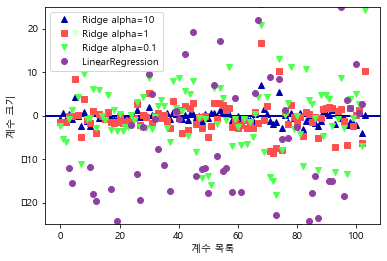

In [67]:
#릿지회귀는 alpha값을 조정하여 과대적합을 관리한다.

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show() 

In [68]:
#alpha값을 조정하면서 실험하기

#alpha=0.01인경우
ridge10 = Ridge(alpha=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.94
테스트 세트 점수: 0.70


In [71]:
#alpha=0.1인경우
ridge10 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


In [70]:
#alpha=0.5인경우
ridge10 = Ridge(alpha=0.5).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77


In [69]:
#alpha=10인경우
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [ ]:
#alpha가 작을수록 일반선형모델과 비슷해진다.
#alpha가 클수록 과소적합이 된다.

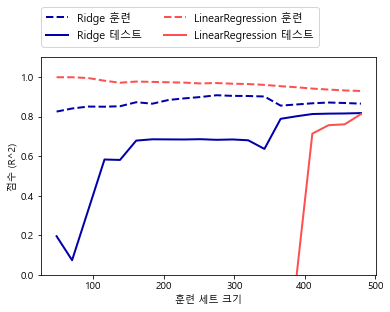

In [72]:
#학습곡선
mglearn.plots.plot_ridge_n_samples()

In [ ]:
#선형모델vs릿지모델
#선형모델장점:훈련에대해 높은성능
#선형모델단점:과대적합
#릿지모델장점:테스트에대해 높은성능
#릿지모델단점:데이터증가시 규제효과감소

In [ ]:
#라쏘회귀 => 특성중 중요하지 않는 특성제거가능!

In [73]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ != 0))

#alpha=1인경우
#적은특성사용, 과소적합

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [74]:
# max_iter 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생합니다
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [75]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))

#alpha를 작게하면 선형모델과 유사합니다

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:102: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


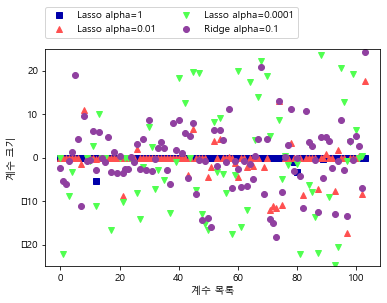

In [76]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.show()

In [ ]:
#alpha=0.01일때 많은 특성이 0이 됨을 볼 수 있다.

In [ ]:
#릿지 vs 라쏘
#라쏘는 가중치가 0이 될수 있다
#따라서 특징을 선별할수 있다 => 해석력up

In [ ]:
#로지스틱회귀=>분류

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [90]:
iris=datasets.load_iris()

print("타깃의 이름:{}".format(iris['target_names']))
print("특성의 이름:{}".format(iris['feature_names']))

X=iris["data"][:,3:] #pedal width
print(X.shape)
y=(iris["target"]==2).astype(np.int) #virginica면 1 , 아니면0
print(y.shape)

타깃의 이름:['setosa' 'versicolor' 'virginica']
특성의 이름:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 1)
(150,)


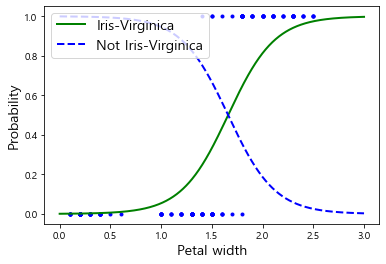

array([1, 0, 0, 1])

In [103]:
log_reg=LogisticRegression()
log_reg.fit(X,y)

#꽃잎의 너비가 0-3cm인 꽃에 대해 모델의 추정확률
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)

#그래프출력
plt.plot(X,y,"b.")
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginica")
plt.xlabel("Petal width",fontsize=14)
plt.ylabel("Probability",fontsize=14)
plt.legend(loc="upper left",fontsize=14)
plt.show()

#test해보기
log_reg.predict([[1.7],[1.5],[1.3],[2.0]])

In [99]:
#결정결계는 Iris와 Not Iris가 만나는 지점의 x값이다
#결정경계보다 크면 Iris로 판정
#아니면 Not Iris로 판정된다.

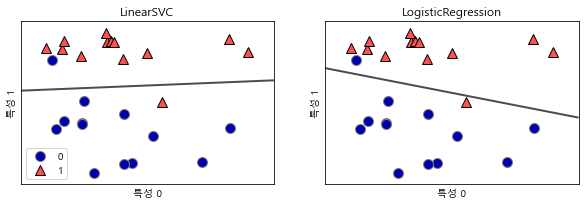

In [104]:
#로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()
plt.show() # 책에는 없음

In [ ]:
#선형분석 vs 로지스틱회귀 비교
#기울기가 다르다
#분류결과는 비슷하다

In [ ]:
#cancer data 분류관찰
#c값에 따른 변화관찰

In [105]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

#C=1인경우
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [106]:
#C=100인경우
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.984
테스트 세트 점수: 0.965


In [107]:
#C=0.01인경우
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


In [ ]:
#C값이 크면 규제가 작아지고 훈련set에 맞춰진다
#따라서 과적합이 발생할수 있다.

#C값이 작으면 규제가 커서 다수의 포인터에 맞춘다.

In [ ]:
#규제비교 L2 vs L1

C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:102: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


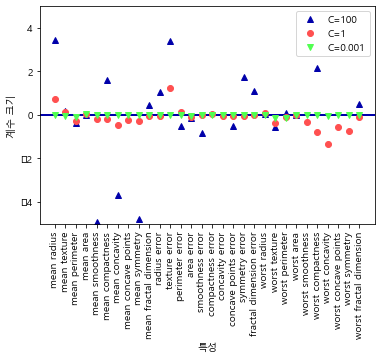

In [108]:
#L2규제인경우
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show()

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
사용한 특성의 개수:3
사용한 특성:[[ 0.     0.     0.057  0.005  0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.    -0.01   0.     0.     0.     0.     0.     0.   ]]

C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
사용한 특성의 개수:10
사용한 특성:[[ 3.74   0.082 -0.17  -0.012  0.     0.     0.     0.     0.     0.
   0.     1.437  0.    -0.093  0.     0.     0.     0.     0.     0.
   0.    -0.331 -0.055 -0.017  0.     0.    -3.663  0.     0.     0.   ]]

C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98
사용한 특성의 개수:23
사용한 특성:[[  0.876  -0.194   0.113  -0.005 -12.064  65.866  -5.327 -86.916   0.
    0.     -1.189   0.721   0.953  -0.243   0.      0.     36.467   0.
   34.901   0.      0.334  -0.304   0.041  -0.023 -50.85    0.311 -10.54
  -45.244 -19.599   0.   ]]



C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Bisu\anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:102: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)


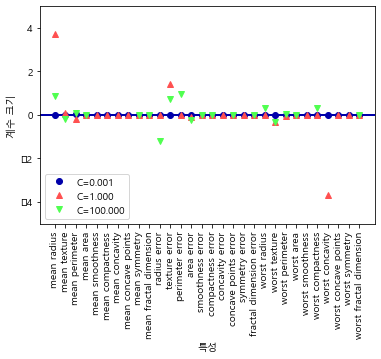

In [113]:
#L1규제인경우

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    print("사용한 특성의 개수:{}".format(np.sum(lr_l1.coef_!=0)))
    print("사용한 특성:{}\n".format(lr_l1.coef_))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show() 

In [ ]:
#mean parameter특성은 양클레스 모두에 영향을준다
#texture rror는 한 클래스에만 영향을 준다

In [ ]:
#L1규제 분석결과
#C가 작을수록 (규제가커져서) 사용한 특성의 개수가 작아진다!
#C가 작을때 사용된 특성이 중요한 특성이다

#L1규제 => 중요한특성 판별하기